In [1]:
# --- Setup and Imports ---
import os
import sys
import pandas as pd
from IPython.display import Image, display

# Ensure the parent directory is in the path to import project modules (src/)
if 'src' not in sys.path:
    sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

Dependencies imported successfully.
Building Graph...


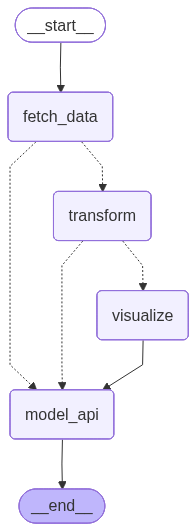

Graph visualization generated successfully.


In [9]:
# Import graph components and the LLM client
from src.memory.state import FinanceState
from src.graph.graph_defination import create_finance_graph

print("Dependencies imported successfully.")
print("Building Graph...")

# Compile the graph
graph = create_finance_graph()

# --- Build & Visualize Graph (Mermaid PNG) ---
try:
    # Use the compiled graph's visualization method
    display(Image(graph.get_graph().draw_mermaid_png()))
    print("Graph visualization generated successfully.")
except Exception as e:
    print("Graph rendering failed:", e)
    print("Note: Install 'graphviz' and 'pydot' if you want visual output.")

In [3]:
# --- Run Pipeline for BTC, ETH, SOL (Default: 7 days) ---
assets = ["bitcoin", "ethereum", "solana"]
final_states = {}

for a in assets:
    print(f"\nRunning Pipeline for: {a.upper()}...")

    # Initialize the FinanceState object with required fields
    init = FinanceState(
        query=f"Analyze the performance and volatility score for {a} over 7 days.",
        asset=a,
        days=7,
        raw_data=None,
        cleaned_data=None,
        volatility_score=0.0,
        memory_log=[],
        llm_summary="",
        comparison_plot=None
    )

    # Invoke the graph with the initial state
    final_states[a] = graph.invoke(init)
    print(f"Done for {a.upper()}.")

print("\nAll asset pipelines completed.")


Running Pipeline for: BITCOIN...

--- Node: 1/4 - FETCH_DATA (Real API) ---
-> Asset Detected: BTC
-> Status: Fetching data for BTC...
   -> HTTP GET: https://api.coinpaprika.com/v1/tickers/btc-bitcoin/historical (start=2025-11-13)

--- ROUTER 1 (Data Check): Asset=btc, VisualFlag=False ---

--- Node: 2/4 - TRANSFORM_NODE (Calculating Statistics) ---
-> Stats Calculated for: ['btc']

--- ROUTER 2 (Visualization): Asset=btc, VisualFlag=False ---

--- Node 4/4 – MODEL ---
Done for BITCOIN.

Running Pipeline for: ETHEREUM...

--- Node: 1/4 - FETCH_DATA (Real API) ---
-> Asset Detected: ETH
-> Status: Fetching data for ETH...
   -> HTTP GET: https://api.coinpaprika.com/v1/tickers/eth-ethereum/historical (start=2025-11-13)

--- ROUTER 1 (Data Check): Asset=eth, VisualFlag=False ---

--- Node: 2/4 - TRANSFORM_NODE (Calculating Statistics) ---
-> Stats Calculated for: ['eth']

--- ROUTER 2 (Visualization): Asset=eth, VisualFlag=False ---

--- Node 4/4 – MODEL ---
Done for ETHEREUM.

Running 

In [3]:
def run_workflow(query: str, system_instruction: False):
    """
    Clean public entry point so the notebook can call run_workflow("my query").
    """
    return graph.invoke({"query": query})


In [4]:

p1 = "Explain cryptocurrency volatility in simple terms."
final_state = run_workflow(p1, False)

print(final_state["final_answer"])



--- Node: 1/4 - FETCH_DATA ---
-> Result: No specific asset. Routing to Simple Query.

--- Node: 4/4 - MODEL ---
-> Simple Query Mode
## Simple Query Answer
**Query:** Explain cryptocurrency volatility in simple terms.

Cryptocurrency volatility, in simple terms, means that the price of a cryptocurrency can change **very quickly and dramatically** in a short period of time.

Think of it like a rollercoaster:

*   **High Volatility:** The price goes up and down with big, sharp movements. You might see a coin's value jump 20% in a day, only to drop 15% the next.
*   **Low Volatility:** The price moves up or down more slowly and stays relatively stable.

Cryptocurrencies are known for having **high volatility** compared to traditional assets like stocks or bonds.

### Why is Crypto So Volatile?

There are a few main reasons for these big price swings:

1.  **The Market is Young and Immature:** The crypto market is relatively new compared to traditional financial markets, which have been 

In [5]:
p3 = "Describe the typical phases of a cryptocurrency market cycle."
system_prompt_grounded = "You are a finance academic. Provide a clear, structured, and technically accurate explanation."
r3 = run_workflow(p3, system_prompt_grounded)

print("Prompt 3 Output:\n")
display(r3)



--- Node: 1/4 - FETCH_DATA ---
-> Result: No specific asset. Routing to Simple Query.

--- Node: 4/4 - MODEL ---
-> Simple Query Mode
Prompt 3 Output:



{'query': 'Describe the typical phases of a cryptocurrency market cycle.',
 'asset': None,
 'raw_data': None,
 'final_answer': '## Simple Query Answer\n**Query:** Describe the typical phases of a cryptocurrency market cycle.\n\nThe cryptocurrency market cycle is a recurring pattern of price movement, sentiment, and trading activity, often compressed and more volatile than traditional markets. It typically unfolds in four main phases:\n\n### 1. Accumulation Phase (The Bottom)\n\n*   **Price Action:** Prices are relatively low and stable, often trading sideways within a tight range after a major market downturn.\n*   **Investor Sentiment:** Sentiment is generally **bearish** or extremely pessimistic, as the public has lost interest following the crash.\n*   **Characteristics:** Trading volume is subdued. Savvy, long-term investors (often called "smart money") quietly begin to **accumulate** assets, anticipating future growth. This phase is often considered the best risk-reward entry poin

In [13]:
from IPython.display import display, Markdown

p4 = "compare differences between Bitcoin and Ethereum from an economic perspective?"
system_prompt_grounded = "You are a finance academic. Provide a rigorous, structured explanation with subsections."

# Execute the workflow
r4 = run_workflow(p4, system_prompt_grounded)

print("\n" + "="*40)
print("Prompt 4 Output:")
print("="*40)

# Check for output and display formatted Markdown
if r4.get('llm_output'):
    display(Markdown(r4['llm_output']))
else:
    print("No output generated.")

if r4.get('error'):
    print(f"\nError Trace: {r4['error']}")


--- Node: 1/4 - FETCH_DATA ---
-> Asset Detected: COMPARE
   -> HTTP GET: https://api.coinpaprika.com/v1/tickers/btc-bitcoin/historical (start=2025-11-13)
   -> HTTP GET: https://api.coinpaprika.com/v1/tickers/eth-ethereum/historical (start=2025-11-13)

--- Node: 2/4 - TRANSFORM_NODE (Calculating Statistics) ---
-> Stats Calculated for: ['btc', 'eth']

--- Node: 3/4 - VISUALIZE (Generating Comparison Graph) ---
-> Graph generated. BTC Final: -4.75%, ETH Final: -4.80%

--- Node: 4/4 - MODEL ---
-> Comparison Mode

Prompt 4 Output:


## BTC vs ETH Analysis

![Chart](data:image/png;base64,
[Graph Description]
A line graph comparing the percentage change of Bitcoin and Ethereum over 7 days.
- Bitcoin started at 0% and ended at -4.75%.
- Ethereum started at 0% and ended at -4.80%.
- The chart visualizes the volatility and relative performance. 
)

### Analyst Summary
As a quantitative analyst, I will first address the provided volatility data and then proceed with a detailed economic comparison between Bitcoin (BTC) and Ethereum (ETH).

---

## I. Analysis of Provided Volatility Data

| Asset | Volatility (Annualized Proxy) |
| :--- | :--- |
| **BTC** | 2.2% |
| **ETH** | 1.96% |

**Interpretation:**
The provided figures suggest that, in this specific measurement period, **Bitcoin exhibited marginally higher volatility than Ethereum.**

From a quantitative perspective, this difference (24 basis points) is minor and often fluctuates daily. Historically, BTC and ETH have maintained a high correlation (often $R > 0.8$), meaning their price movements are largely synchronized, driven by similar macroeconomic factors (e.g., interest rates, liquidity, regulatory news).

The key economic difference between the two assets is not their short-term risk profile (which is similar), but their **fundamental utility, monetary policy, and role within the broader digital economy.**

---

## II. Economic Comparison: BTC vs. ETH

The most critical distinction is that **Bitcoin is primarily an economic good designed for scarcity and value storage,** while **Ethereum is an economic platform designed for utility and decentralized computation.**

### 1. Monetary Policy and Supply Economics

| Feature | Bitcoin (BTC) | Ethereum (ETH) |
| :--- | :--- | :--- |
| **Supply Cap** | Hard Capped (21 million) | No Hard Cap (Dynamic Supply) |
| **Inflation Mechanism** | Strictly decreasing (Halving every ~4 years) | Variable. Determined by staking rewards and EIP-1559 burning. |
| **Economic Goal** | Absolute scarcity; Deflationary asset (Digital Gold). | Optimized utility; Supply adjusts to network demand (Ultrasound Money). |
| **Stock-to-Flow** | Very high and increasing. | Lower, but supply can become deflationary during high network usage. |

**Economic Implication:**
Bitcoin’s monetary policy is fixed, transparent, and designed to maximize scarcity, making it a strong candidate for a **macro asset** or a hedge against fiat debasement. Ethereum’s policy is adaptive; its supply dynamics are tied directly to its utility. High demand (high gas fees) leads to more burning, potentially making ETH deflationary—a unique economic feedback loop where network success reduces supply.

### 2. Utility and Economic Output

| Feature | Bitcoin (BTC) | Ethereum (ETH) |
| :--- | :--- | :--- |
| **Primary Utility** | Store of Value (SoV) and final settlement layer. | Decentralized computation, smart contract execution, and platform hosting. |
| **Economic Output** | Limited to transaction settlement and security provision. | Vast. Hosts Decentralized Finance (DeFi), NFTs, stablecoins, and DAOs. |
| **Economic Analogy** | Gold or a reserve currency. | An operating system or a global computer generating economic activity (akin to GDP). |
| **Valuation Thesis** | Based on scarcity, security, and adoption as a non-sovereign SoV. | Based on cash flows (fees) generated by the network and the Total Value Locked (TVL) in its ecosystem. |

**Economic Implication:**
BTC is valued primarily for its **security and immutability**. ETH is valued for its **productivity and utility**. Investing in BTC is a bet on the failure of traditional monetary systems; investing in ETH is a bet on the growth and adoption of the decentralized internet (Web3).

### 3. Economic Security Model (Post-Merge)

The shift of Ethereum to Proof-of-Stake (PoS) fundamentally changed its economic security model compared to Bitcoin’s Proof-of-Work (PoW).

| Feature | Bitcoin (PoW) | Ethereum (PoS) |
| :--- | :--- | :--- |
| **Security Mechanism** | Energy expenditure (Mining). | Capital expenditure (Staking). |
| **Cost of Security** | High external energy cost. | High internal opportunity cost (capital locked in staking). |
| **Economic Incentive** | Block rewards and transaction fees fund miners. | Staking rewards and transaction fees fund validators. |
| **Attack Cost** | Requires massive capital investment in hardware and sustained energy consumption. | Requires acquiring 51% of the staked ETH, which is prohibitively expensive and risks the attacker’s capital being slashed (destroyed). |

**Economic Implication:**
BTC’s security is anchored to the physical world (energy). ETH’s security is anchored to the value of its native asset. This makes ETH’s security model more capital-efficient but introduces new risks related to centralization of staking pools and regulatory scrutiny of staked assets.

### 4. Risk Profile and Regulatory Status

| Feature | Bitcoin (BTC) | Ethereum (ETH) |
| :--- | :--- | :--- |
| **Protocol Risk** | Very low. The protocol is highly stable and rarely changes. | Moderate. Constant upgrades (sharding, scaling) introduce complexity and execution risk. |
| **Regulatory Status** | Generally viewed as a **commodity** (e.g., by the CFTC in the U.S.). | Ambiguous. While the SEC has suggested PoW ETH was decentralized enough to be a commodity, the shift to PoS introduces the potential for it to be viewed as a **security** due to staking rewards and governance structure. |
| **Systemic Risk** | Primarily exposure to macro liquidity and regulatory bans. | Exposure to macro factors *plus* exposure to smart contract failures and DeFi exploits. |

---

## III. Conclusion: The Investment Thesis

From an economic and quantitative perspective, BTC and ETH represent distinct asset classes within the digital asset ecosystem:

1.  **Bitcoin (BTC): The Macro Asset.**
    *   **Thesis:** BTC is a non-sovereign, inflation-resistant Store of Value. It should be analyzed alongside gold, long-duration bonds, and reserve currencies. Its value is derived from its absolute scarcity and its role as a hedge against monetary expansion.

2.  **Ethereum (ETH): The Equity-Like Commodity.**
    *   **Thesis:** ETH is a productive asset whose value is derived from the economic activity it facilitates. It should be analyzed more like a technology platform or an equity, where valuation models incorporate network fees, user growth, and the Total Value Locked (TVL) in its ecosystem.

While both assets exhibit high volatility and correlation, the underlying economic drivers of their long-term value are fundamentally different. BTC is a bet on scarcity; ETH is a bet on utility and decentralized economic growth.

In [6]:
p6 = "What are the most significant risks investors face in crypto in buying btc?"
system_prompt_grounded = "You are a finance academic. Provide a structured analysis with bullet points."
r6 = run_workflow(p6, system_prompt_grounded)

print("Prompt 6 Output:\n")
display(r6)



--- Node: 1/4 - FETCH_DATA ---
-> Asset Detected: BTC
   -> HTTP GET: https://api.coinpaprika.com/v1/tickers/btc-bitcoin/historical (start=2025-11-13)

--- Node: 2/4 - TRANSFORM_NODE (Calculating Statistics) ---
-> Stats Calculated for: ['btc']

--- Node: 4/4 - MODEL ---
-> Single Asset Mode: btc
Prompt 6 Output:



{'query': 'What are the most significant risks investors face in crypto in buying btc?',
 'asset': 'btc',
 'raw_data': {'btc': [{'date': '2025-11-14', 'price': 96760.18},
   {'date': '2025-11-15', 'price': 95903.02},
   {'date': '2025-11-16', 'price': 95270.66},
   {'date': '2025-11-17', 'price': 94266.69},
   {'date': '2025-11-18', 'price': 91789.37},
   {'date': '2025-11-19', 'price': 91016.81},
   {'date': '2025-11-20', 'price': 92166.35}]},
 'stats': {'btc': {'days_analyzed': 7,
   'average_price': np.float64(93881.87),
   'min_price': np.float64(91016.81),
   'max_price': np.float64(96760.18),
   'volatility_percent': np.float64(2.2)}},
 'final_answer': '## BTC Analysis\n\n### Stats\n| Metric | Value |\n|---|---|\n| Avg | $93881.87 |\n| Volatility | 2.2% |\n\n### Report\nThis analysis addresses the provided metrics for Bitcoin (BTC) and outlines the most significant risks investors face when entering the cryptocurrency market.\n\n---\n\n## Financial Analyst Report: Bitcoin Risk As

In [8]:
p4 = "compare differences between Bitcoin and Ethereum from an economic perspective?"
system_prompt_grounded = "You are a finance academic. Provide a rigorous, structured explanation with subsections."
r4 = run_workflow(p4, system_prompt_grounded)

print("Prompt 4 Output:\n")
display(r4)



--- Node: 1/4 - FETCH_DATA (Real API) ---
-> Asset Detected: COMPARE
-> Status: Fetching comparison data (BTC & ETH)...
   -> HTTP GET: https://api.coinpaprika.com/v1/tickers/btc-bitcoin/historical (start=2025-11-13)
   -> HTTP GET: https://api.coinpaprika.com/v1/tickers/eth-ethereum/historical (start=2025-11-13)

--- ROUTER 1 (Data Check): Asset=compare, VisualFlag=False ---

--- Node: 2/4 - TRANSFORM_NODE (Calculating Statistics) ---
-> Stats Calculated for: ['btc', 'eth']

--- ROUTER 2 (Visualization): Asset=compare, VisualFlag=False ---

--- Node: 3/4 - VISUALIZE (Generating Comparison Graph) ---
-> Graph generated. BTC Final: -4.73%, ETH Final: -4.78%

--- Node 4/4 – MODEL ---
Prompt 4 Output:



{'query': 'compare differences between Bitcoin and Ethereum from an economic perspective?',
 'raw_data': {'btc': [{'date': '2025-11-14', 'price': 96760.18},
   {'date': '2025-11-15', 'price': 95903.02},
   {'date': '2025-11-16', 'price': 95270.66},
   {'date': '2025-11-17', 'price': 94266.69},
   {'date': '2025-11-18', 'price': 91789.37},
   {'date': '2025-11-19', 'price': 91016.81},
   {'date': '2025-11-20', 'price': 92184.74}],
  'eth': [{'date': '2025-11-14', 'price': 3181.4},
   {'date': '2025-11-15', 'price': 3174},
   {'date': '2025-11-16', 'price': 3154.67},
   {'date': '2025-11-17', 'price': 3124.71},
   {'date': '2025-11-18', 'price': 3067.44},
   {'date': '2025-11-19', 'price': 3030.95},
   {'date': '2025-11-20', 'price': 3029.31}]},
 'asset': 'compare',
 'stats': {'btc': {'days_analyzed': 7,
   'average_price': np.float64(93884.5),
   'min_price': np.float64(91016.81),
   'max_price': np.float64(96760.18),
   'volatility_percent': np.float64(2.2)},
  'eth': {'days_analyzed':